<a href="https://colab.research.google.com/github/Rocha212/Senales/blob/main/corte3/Ejercicios_Slits_Laplce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

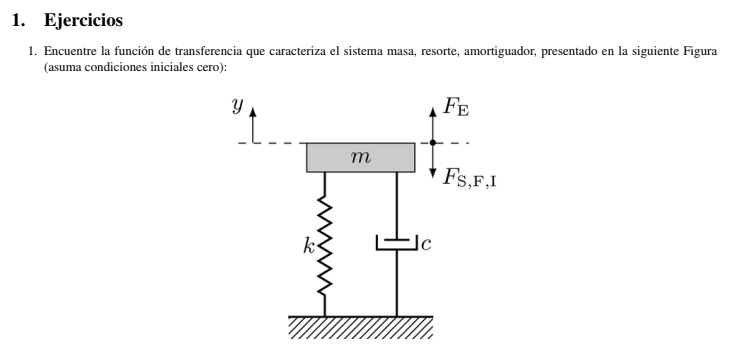

Rta//

El sistema mecanico se describe con la siguiente ecuacion diferencial

$$
F(t)= m(\frac{d^2x}{dt^2})+c(\frac{dx}{dt})+kx
$$

Utilizando la transformada de laplace se obtiene que
$$
F(s)= ms^2X(s)+csX(s)+kX(s)
$$

desde aqui se puede obtener la funcion de transferencia de la siguiente manera

$$
F(s)= X(s)(ms^2+cs+k)
$$

$$
\frac{X(s)}{F(s)}= \frac{1}{ms^2+cs+k}
$$





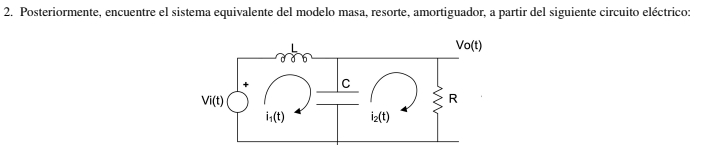

con la ecuacion que obtuvimos de la masa-resorte
$$
F(t)= m(\frac{d^2x}{dt^2})+c(\frac{dx}{dt})+kx
$$
podemos decir que m=L, c=R y k=1/c

Entonces La ecuacion que modela el circuito es la siguiente:
  $$
  Vi(t)= L(\frac{d^2VR}{dt^2})+R(\frac{dVR}{dt})+\frac{1}{c}VR
  $$

  Y Su transformada de laplace por consiguiente seria asi:

  $$
\frac{VR(s)}{Vi(s)}= \frac{1}{Ls^2+Rs+\frac{1}{c}}
$$


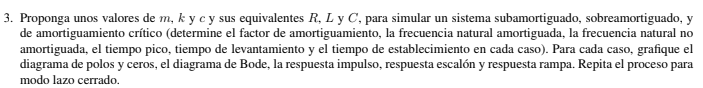

In [3]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, L, R, C = sym.symbols('t L R C', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(L*y.diff(t, 2) + R*y.diff(t) + (1/C)*y, x)
ode

   2                                  
  d             d          y(t)       
L⋅───(y(t)) + R⋅──(y(t)) + ──── = x(t)
    2           dt          C         
  dt                                  

In [15]:
RLC = {L: sym.Rational('.5'), R: 0.1, C: sym.Rational('2.5')}
RLC

{C: 1/100, L: 1/10, R: 10}

In [11]:
solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
solution_h

            ⎛        ________________⎞              ⎛       ________________⎞                      ↪
            ⎜       ╱   ⎛   2      ⎞ ⎟              ⎜      ╱   ⎛   2      ⎞ ⎟               ⎛      ↪
            ⎜     ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟              ⎜    ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟               ⎜      ↪
          t⋅⎜-R + ───────────────────⎟           -t⋅⎜R + ───────────────────⎟               ⎜      ↪
            ⎝              C         ⎠              ⎝             C         ⎠             t⋅⎜-R +  ↪
          ────────────────────────────           ─────────────────────────────              ⎝      ↪
                      2⋅L                                     2⋅L                         ──────── ↪
       C⋅ℯ                            ⋅θ(t)   C⋅ℯ                             ⋅θ(t)                ↪
h(t) = ──────────────────────────────────── - ───────────────────────────────────── + C₁⋅ℯ         ↪
                  ________________                        ________________                 

In [12]:
integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
integration_constants

{C₁: 0, C₂: 0}

In [13]:
h = solution_h.subs(integration_constants)
h

            ⎛        ________________⎞              ⎛       ________________⎞      
            ⎜       ╱   ⎛   2      ⎞ ⎟              ⎜      ╱   ⎛   2      ⎞ ⎟      
            ⎜     ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟              ⎜    ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟      
          t⋅⎜-R + ───────────────────⎟           -t⋅⎜R + ───────────────────⎟      
            ⎝              C         ⎠              ⎝             C         ⎠      
          ────────────────────────────           ─────────────────────────────     
                      2⋅L                                     2⋅L                  
       C⋅ℯ                            ⋅θ(t)   C⋅ℯ                             ⋅θ(t)
h(t) = ──────────────────────────────────── - ─────────────────────────────────────
                  ________________                        ________________         
                 ╱   ⎛   2      ⎞                        ╱   ⎛   2      ⎞          
               ╲╱  C⋅⎝C⋅R  - 4⋅L⎠                      ╲╱  C⋅⎝C⋅R  - 4⋅L⎠   

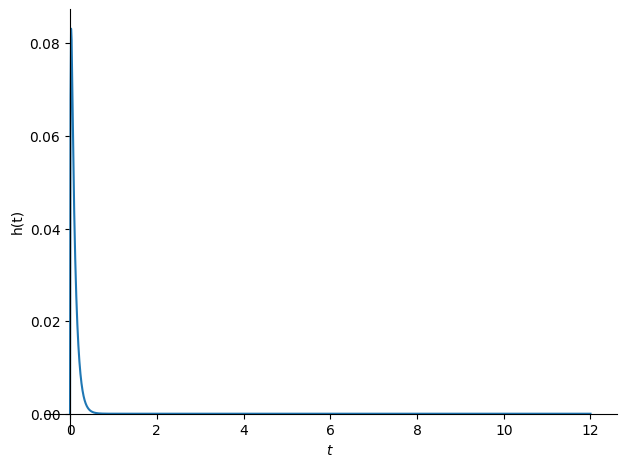

In [16]:
sym.plot(h.rhs.subs(RLC), (t,0,12), ylabel=r'h(t)');